In [1]:
import os
base_dir = 'C:\\Users\heine\github\PlateReaderTools'
os.chdir(base_dir) 

#import sys
from core import plate_reader_tools 
import pandas as pd
import numpy as np
# import math
# import matplotlib
import matplotlib.pyplot as plt
import string
import seaborn as sns
from itertools import chain

# import os
# import sys

# path = '/Users/andrewng/Documents/PlateReaderTools'
# if not path in sys.path:
#     sys.path.insert(1, path)
# del path

# from plate_reader_tools import *
# import seaborn as sns
# sns.set_style("white")
# sns.set_style("ticks")

%load_ext autoreload
%autoreload 2
%matplotlib notebook
#%matplotlib inline

In [2]:
dirname = "C:\\Users\\heine\\Google Drive\\UCSF\\ElSamad_Lab\\CRISPR iGRNA\\experiments\\plate_reader\\"
fname = dirname + "20170812_HIS_integration_growth_20170316_BMH_24h.xlsx"
#date = fname[-13:-5]
sheetname = 'Result sheet'
skiprows = 50
rows = 8
columns = 12
datalabels = ['OD','YFP'] 
cycles = 88
horz = 0


In [3]:
[d,time_list] = plate_reader_tools.readplate(fname,sheetname, skiprows, rows, columns, datalabels, cycles, horz)
OD_data = d['OD']


In [4]:
OD_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0.0838,0.0771,0.0673,0.0681,0.0546,0.0555,0.0773,0.0655,0.0422,0.0426,...,0.0643,0.0655,0.0809,0.0665,0.0742,0.0862,0.0684,0.0622,0.0625,0.0669
1,0.0842,0.0783,0.0689,0.0760,0.0699,0.0730,0.0821,0.0649,0.0420,0.0427,...,0.0845,0.0811,0.0974,0.0852,0.0772,0.0940,0.0829,0.0833,0.0856,0.0833
2,0.0889,0.0832,0.0730,0.0847,0.0729,0.0816,0.0926,0.0647,0.0421,0.0425,...,0.1018,0.0919,0.1097,0.1028,0.0832,0.1092,0.0961,0.0991,0.0976,0.0973
3,0.0950,0.0901,0.0763,0.0934,0.0769,0.0918,0.1059,0.0646,0.0421,0.0424,...,0.1164,0.1047,0.1205,0.1193,0.0931,0.1246,0.1048,0.1104,0.1095,0.1090
4,0.1016,0.0987,0.0804,0.1005,0.0802,0.1015,0.1229,0.0644,0.0423,0.0427,...,0.1272,0.1148,0.1306,0.1301,0.1081,0.1465,0.1152,0.1215,0.1202,0.1200
5,0.1081,0.1095,0.0845,0.1078,0.0836,0.1084,0.1471,0.0644,0.0421,0.0424,...,0.1408,0.1271,0.1396,0.1419,0.1280,0.1723,0.1265,0.1325,0.1300,0.1288
6,0.1146,0.1195,0.0880,0.1157,0.0855,0.1151,0.1749,0.0645,0.0418,0.0424,...,0.1537,0.1395,0.1497,0.1533,0.1549,0.2043,0.1384,0.1451,0.1398,0.1393
7,0.1216,0.1317,0.0915,0.1255,0.0877,0.1231,0.2104,0.0645,0.0420,0.0425,...,0.1694,0.1523,0.1618,0.1669,0.1854,0.2452,0.1519,0.1596,0.1511,0.1498
8,0.1282,0.1442,0.0965,0.1364,0.0898,0.1308,0.2456,0.0644,0.0420,0.0425,...,0.1869,0.1687,0.1751,0.1823,0.2242,0.2957,0.1674,0.1775,0.1652,0.1641
9,0.1356,0.1570,0.1013,0.1481,0.0922,0.1396,0.2825,0.0643,0.0421,0.0424,...,0.2072,0.1867,0.1911,0.1993,0.2650,0.3453,0.1845,0.1960,0.1789,0.1781


In [4]:
OD_data_filtered, OVER_list = plate_reader_tools.over_filter(OD_data)



No OVER values in data


<IPython.core.display.Javascript object>


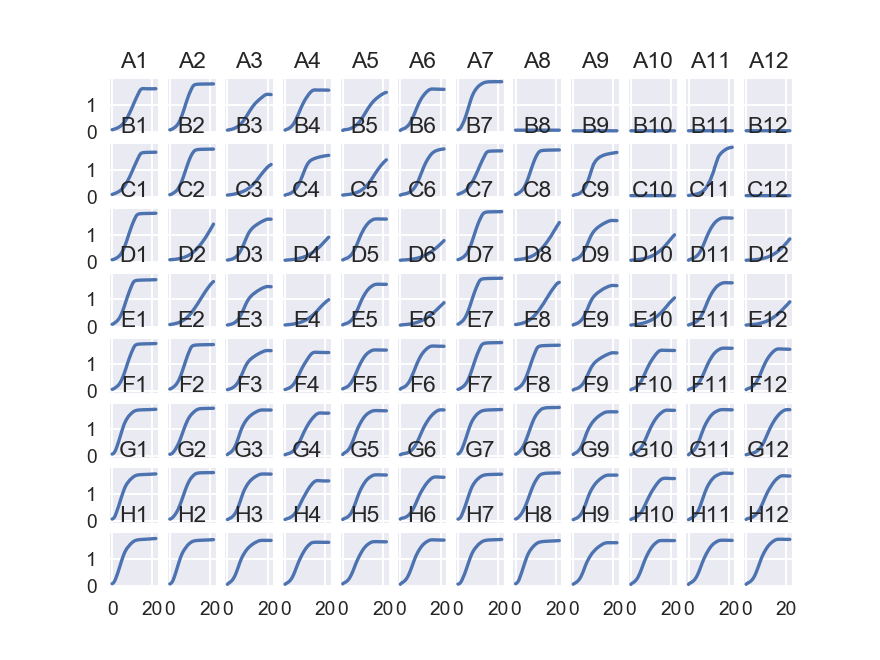

In [5]:
#Plot all wells in an array similar to the plate. 
letter_range = ['A','B','C','D','E','F','G','H']
number_range = range(1,13)
well_arr = plate_reader_tools.well_array_builder(letter_range,number_range)
fig = plate_reader_tools.subplot_array(OD_data.replace('OVER',np.nan), well_arr, time_list)

In [6]:
#Build Multiindex dataframe to compare different conditions.  
layer_names = ['Media','Strain','Background','Tech_Rep']
backgrounds = ['w303','BY4741']
media = ['YPD','SD-HIS','SDC']
strains = ['+YTK190 1', '+YTK190 2', '+YTK190 3', '+pTMP136 1', '+pTMP136 2', '+pTMP136 3', 'AHN321', 'HES5-41','WCD230','yBMH126', 'yBMH127']
tech_reps = ['TR1','TR2']      
experiment_setup = [media, strains, backgrounds, tech_reps]      
data_index = pd.MultiIndex.from_product(experiment_setup, names= layer_names)
print(data_index.levels)
print(data_index.names)
         


[['SD-HIS', 'SDC', 'YPD'], ['+YTK190 1', '+YTK190 2', '+YTK190 3', '+pTMP136 1', '+pTMP136 2', '+pTMP136 3', 'AHN321', 'HES5-41', 'WCD230', 'yBMH126', 'yBMH127'], ['BY4741', 'w303'], ['TR1', 'TR2']]
['Media', 'Strain', 'Background', 'Tech_Rep']


In [7]:
#remove missing conditions from data
# Step 1: make index list for the coordinates of all the missing items based on pairs of missing conditions. 
 
# #w303 background doesn't have 'WCD230','AHN321', 'yBMH126', 'yBMH127' strains. 
# 'HES5-41','yBMH126', 'yBMH127' don't have tech rep 2  
missing_items = [('Background','w303','Strain','yBMH126'),
                 ('Background','w303','Strain','yBMH127'),
                 ('Background','w303','Strain','WCD230'),
                 ('Background','w303','Strain','AHN321'),
                 ('Background','BY4741','Strain','HES5-41'),
                 ('Strain','yBMH126','Tech_Rep','TR2'),
                 ('Strain','yBMH127','Tech_Rep','TR2'),
                 ('Strain','HES5-41','Tech_Rep','TR2')
                ]

data_index_adjusted, inds_to_remove = plate_reader_tools.delete_multiindex_for_missing_conditions(missing_items, data_index)

#Inds to remove should be constructed from this list of lists: 
#[[36, 37, 80, 81, 124, 125], [40, 41, 84, 85, 128, 129], [32, 33, 76, 77, 120, 121], [24, 25, 68, 69, 112, 113], [30, 31, 74, 75, 118, 119], [37, 39, 81, 83, 125, 127], [41, 43, 85, 87, 129, 131], [29, 31, 73, 75, 117, 119]]

In [60]:
#Step 2 assign wells in the correct order to the index.  This is a manuyal process - you either can usethis tool
#to print out the order of the conditions so that you can generate a list of wells yourself or use
#the input function to build it one well at a time.  
#If you break in the middle of the routine the well_list will be there in memory or you can copy / paste it from the screen

well_list = plate_reader_tools.view_or_input_exp_design(data_index_adjusted)


print out list (1) or add wells one by one (2)1
['YPD', '+YTK190 1', 'w303', 'TR1']
['YPD', '+YTK190 1', 'w303', 'TR2']
['YPD', '+YTK190 1', 'BY4741', 'TR1']
['YPD', '+YTK190 1', 'BY4741', 'TR2']
['YPD', '+YTK190 2', 'w303', 'TR1']
['YPD', '+YTK190 2', 'w303', 'TR2']
['YPD', '+YTK190 2', 'BY4741', 'TR1']
['YPD', '+YTK190 2', 'BY4741', 'TR2']
['YPD', '+YTK190 3', 'w303', 'TR1']
['YPD', '+YTK190 3', 'w303', 'TR2']
['YPD', '+YTK190 3', 'BY4741', 'TR1']
['YPD', '+YTK190 3', 'BY4741', 'TR2']
['YPD', '+pTMP136 1', 'w303', 'TR1']
['YPD', '+pTMP136 1', 'w303', 'TR2']
['YPD', '+pTMP136 1', 'BY4741', 'TR1']
['YPD', '+pTMP136 1', 'BY4741', 'TR2']
['YPD', '+pTMP136 2', 'w303', 'TR1']
['YPD', '+pTMP136 2', 'w303', 'TR2']
['YPD', '+pTMP136 2', 'BY4741', 'TR1']
['YPD', '+pTMP136 2', 'BY4741', 'TR2']
['YPD', '+pTMP136 3', 'w303', 'TR1']
['YPD', '+pTMP136 3', 'w303', 'TR2']
['YPD', '+pTMP136 3', 'BY4741', 'TR1']
['YPD', '+pTMP136 3', 'BY4741', 'TR2']
['YPD', 'AHN321', 'BY4741', 'TR1']
['YPD', 'AHN321',

UnboundLocalError: local variable 'well_list' referenced before assignment


print out list (1) or add wells one by one (2)2
input well for ['YPD', '+YTK190 1', 'w303', 'TR1'] : F1
correct well: F1? 1=Yes, 0 = No, exit = break loop1
['F1']
input well for ['YPD', '+YTK190 1', 'w303', 'TR2'] : F7
correct well: F7? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7']
input well for ['YPD', '+YTK190 1', 'BY4741', 'TR1'] : C1
correct well: C1? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1']
input well for ['YPD', '+YTK190 1', 'BY4741', 'TR2'] : C7
correct well: C7? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7']
input well for ['YPD', '+YTK190 2', 'w303', 'TR1'] : G1
correct well: G1? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1']
input well for ['YPD', '+YTK190 2', 'w303', 'TR2'] : G7
correct well: G7? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7']
input well for ['YPD', '+YTK190 2', 'BY4741', 'TR1'] : D1
correct well: D1? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1']
input well for ['YPD', '+YTK190 2', 'BY4741', 'TR2'] : D7
correct well: D7? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7']
input well for ['YPD', '+YTK190 3', 'w303', 'TR1'] : H1
correct well: H1? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1']
input well for ['YPD', '+YTK190 3', 'w303', 'TR2'] : H7
correct well: H7? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7']
input well for ['YPD', '+YTK190 3', 'BY4741', 'TR1'] : E1
correct well: E1? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1']
input well for ['YPD', '+YTK190 3', 'BY4741', 'TR2'] : E7
correct well: E7? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7']
input well for ['YPD', '+pTMP136 1', 'w303', 'TR1'] : F2
correct well: F2? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2']
input well for ['YPD', '+pTMP136 1', 'w303', 'TR2'] : F8
correct well: F8? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8']
input well for ['YPD', '+pTMP136 1', 'BY4741', 'TR1'] : C2
correct well: C2? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2']
input well for ['YPD', '+pTMP136 1', 'BY4741', 'TR2'] : C8
correct well: C8? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8']
input well for ['YPD', '+pTMP136 2', 'w303', 'TR1'] : G2
correct well: G2? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2']
input well for ['YPD', '+pTMP136 2', 'w303', 'TR2'] : G8
correct well: G8? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8']
input well for ['YPD', '+pTMP136 2', 'BY4741', 'TR1'] : D2
correct well: D2? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2']
input well for ['YPD', '+pTMP136 2', 'BY4741', 'TR2'] : D8
correct well: D8? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8']
input well for ['YPD', '+pTMP136 3', 'w303', 'TR1'] : H2
correct well: H2? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2']
input well for ['YPD', '+pTMP136 3', 'w303', 'TR2'] : H8
correct well: H8? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8']
input well for ['YPD', '+pTMP136 3', 'BY4741', 'TR1'] : E2
correct well: E2? 1=Yes, 0 = No, exit = break loopE8
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8', 'E2']
input well for ['YPD', '+pTMP136 3', 'BY4741', 'TR2'] : E8
correct well: E8? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8', 'E2', 'E8']
input well for ['YPD', 'AHN321', 'BY4741', 'TR1'] : B1
correct well: B1? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8', 'E2', 'E8', 'B1']
input well for ['YPD', 'AHN321', 'BY4741', 'TR2'] : B7
correct well: B7? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8', 'E2', 'E8', 'B1', 'B7']
input well for ['YPD', 'HES5-41', 'w303', 'TR1'] : A7
correct well: A7? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8', 'E2', 'E8', 'B1', 'B7', 'A7']
input well for ['YPD', 'WCD230', 'BY4741', 'TR1'] : B2
correct well: B2? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8', 'E2', 'E8', 'B1', 'B7', 'A7', 'B2']
input well for ['YPD', 'WCD230', 'BY4741', 'TR2'] : B8
correct well: B8? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8', 'E2', 'E8', 'B1', 'B7', 'A7', 'B2', 'B8']
input well for ['YPD', 'yBMH126', 'BY4741', 'TR1'] : A1
correct well: A1? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8', 'E2', 'E8', 'B1', 'B7', 'A7', 'B2', 'B8', 'A1']
input well for ['YPD', 'yBMH127', 'BY4741', 'TR1'] : A2
correct well: A2? 1=Yes, 0 = No, exit = break loop1
['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 'H2', 'H8', 'E2', 'E8', 'B1', 'B7', 'A7', 'B2', 'B8', 'A1', 'A2']
input well for ['SD-HIS', '+YTK190 1', 'w303', 'TR1'] : asdfas
correct well: asdfas? 1=Yes, 0 = No, exit = break loopexit
exiting loop


25, 26 (231)
30, 31 (126, 127)

In [8]:
#The YPD list was generated with the routine above.  The SDC lists were then generated from the YPD list
#manually typing in coordinates.  This will be customized for each experiment layout.  

well_list = {'YPD' : ['F1', 'F7', 'C1', 'C7', 'G1', 'G7', 'D1', 'D7', 'H1', 'H7', 
                      'E1', 'E7', 'F2', 'F8', 'C2', 'C8', 'G2', 'G8', 'D2', 'D8', 
                      'H2', 'H8', 'E2', 'E8', 'B1', 'B7', 'A7', 'B2', 'B8', 'A1',
                      'A2'], 
            'SD-HIS' : ['F3', 'F9', 'C3', 'C9', 'G3', 'G9', 'D3', 'D9', 'H3', 'H9', 'E3', 'E9',
                        'F4', 'F10', 'C4', 'C10', 'G4', 'G10', 'D4', 'D10', 'H4', 'H10', 'E4', 'E10',
                        'B3', 'B9', 'A9', 'B4', 'B10', 'A3', 'A4'], 
             'SDC' : ['F5', 'F11', 'C5', 'C11', 'G5', 'G11', 'D5', 'D11', 'H5', 'H11', 'E5', 'E11',
                    'F6', 'F12', 'C6', 'C12', 'G6', 'G12', 'D6', 'D12', 'H6', 'H12', 'E6', 'E12',
                    'B5', 'B11', 'A11', 'B6', 'B11', 'A5', 'A6']}


In [14]:
blank = {'YPD':np.mean(OD_data['A8']),
        'SD-HIS':np.mean(OD_data['A10']),
        'SDC':np.mean(OD_data['A12'])}

growth_data = []
for medium in media: 
    growth_data.append([OD_data[well]-blank[medium] for well in well_list[medium] ])
growth_data = list(chain.from_iterable(growth_data))

                          
                          
growth_data_df = pd.DataFrame(growth_data, index=data_index_adjusted)

#make columns time points
dt = 15.0/60.0
growth_data_df.columns = growth_data_df.columns*dt

<IPython.core.display.Javascript object>


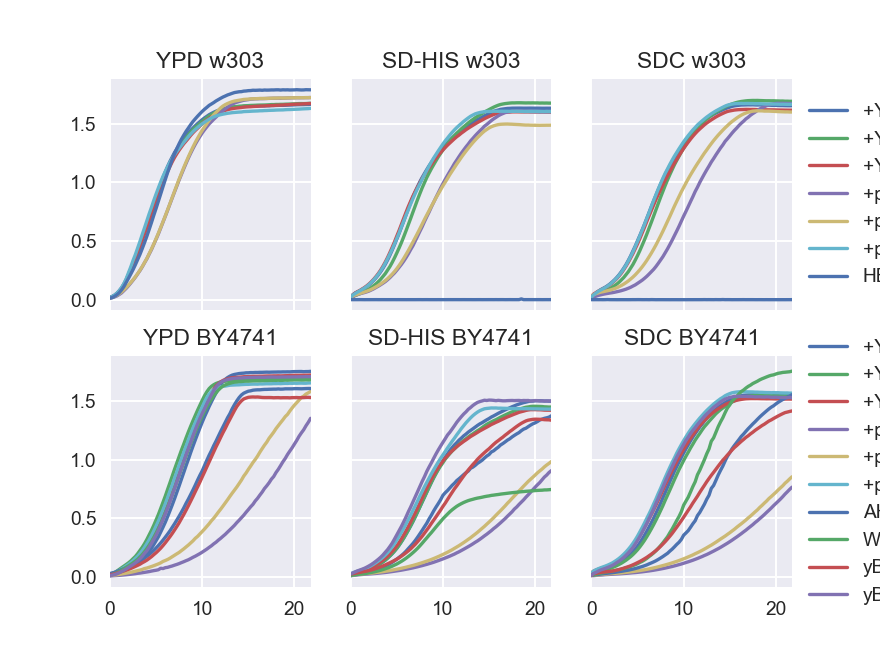

In [17]:
#Plot raw growth curves for all conditions

fig, ax = plt.subplots(2, 3,sharex = True, sharey = True)

for jj, medium in enumerate(media): 
    for kk, background in enumerate(backgrounds):
        #Select data with correct medium and background
        growth_data_df_med_bg = growth_data_df.xs((medium,background),level = ['Media','Background'])
        
        #average across technical replicates.
        growth_data_df_med_bg_avg = growth_data_df_med_bg.mean(level='Strain')

        #Plot growth curves
        #only show labels on right side of the plot. 
        if jj ==2: 
            growth_data_df_med_bg_avg.transpose().plot(ax = ax[kk,jj], title = medium + ' ' + background, legend = True)
            ax[kk,jj].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        else: 
            growth_data_df_med_bg_avg.transpose().plot(ax = ax[kk,jj], title = medium + ' ' + background, legend = False)




<IPython.core.display.Javascript object>


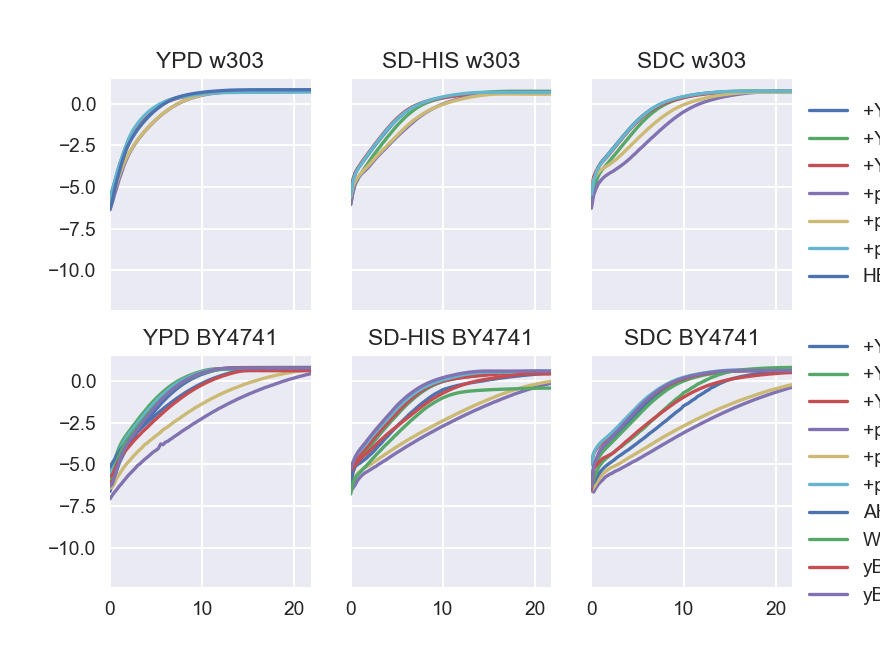

C:\Users\heine\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in log


In [18]:
#Plot log2 growth curves for all conditions
fig, ax = plt.subplots(2, 3,sharex = True, sharey = True)

for jj, medium in enumerate(media): 
    for kk, background in enumerate(backgrounds):
        #Select data with correct medium and background
        growth_data_df_med_bg = growth_data_df.xs((medium,background),level = ['Media','Background'])
        
        #average across technical replicates.
        growth_data_df_med_bg_avg = growth_data_df_med_bg.mean(level='Strain')
        
        #take Log(base2) of data. 
        growth_data_df_med_bg_avg_log = np.log(growth_data_df_med_bg_avg)/np.log(2)
        
        #Plot growth curves
        #only show labels on right side of the plot. 
        if jj ==2: 
            growth_data_df_med_bg_avg_log.transpose().plot(ax = ax[kk,jj], title = medium + ' ' + background, legend = True)
            ax[kk,jj].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        else: 
            growth_data_df_med_bg_avg_log.transpose().plot(ax = ax[kk,jj], title = medium + ' ' + background, legend = False)




Looking at the log plot the linear growth range is between about 2h and 7h.  I'll just use YPD for the next plot which will be a bar plot of growth rates. 

In [ ]:
#This actually only seems true for BY4741.  For W303, the linear range looks more like 0 to 2


<IPython.core.display.Javascript object>


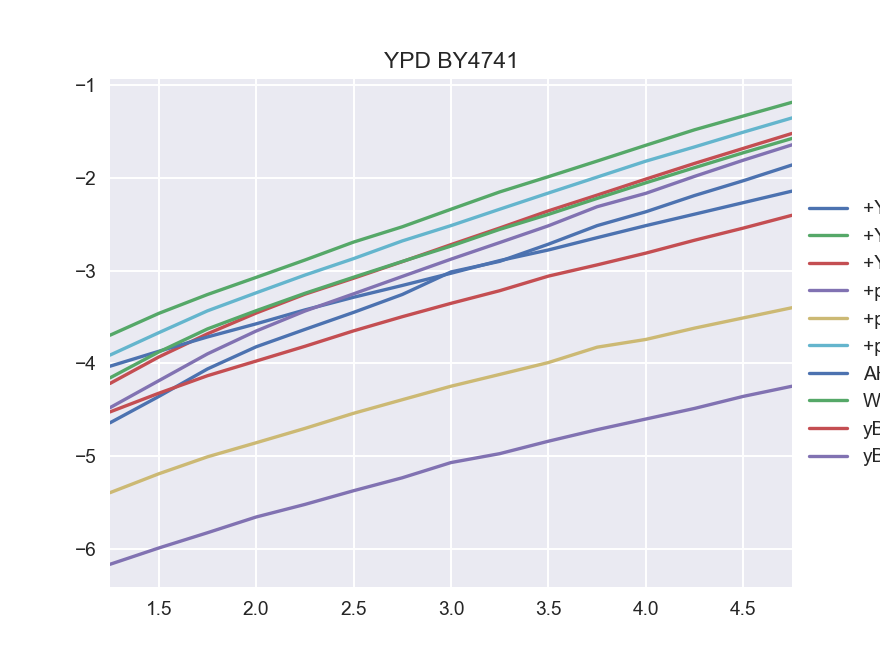

In [21]:
#plot log of YPD BY4741 strains in linear range

#In between time 1 and 5 log plot looked linear.  
t = growth_data_df_med_bg_avg_log.columns
t_low = 1.0 
t_high = 5.0
t_check = (t>t_low)*(t<t_high)
#finds indices of all time values above t_low
t_inds = [ind for ind,val in enumerate(t_check) if val==True]

t_linear_range = t[t_inds]

#Select YPD media and BY4741 background
media = 'YPD'
background = 'BY4741'
growth_data_df_med_bg = growth_data_df.xs((media,background),level = ['Media','Background'])

#Take average
growth_data_df_med_bg_avg = growth_data_df_med_bg.mean(level='Strain')

#Take Log2
growth_data_df_med_bg_avg_log = np.log(growth_data_df_med_bg_avg)/np.log(2)

#Extract only linear range
growth_data_df_med_bg_avg_log_linrange = growth_data_df_med_bg_avg_log.iloc[:,t_inds]

#Plot
fix, ax = plt.subplots()
growth_data_df_med_bg_avg_log_linrange.transpose().plot(ax = ax, title = media + ' ' + background, legend = True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    

<IPython.core.display.Javascript object>


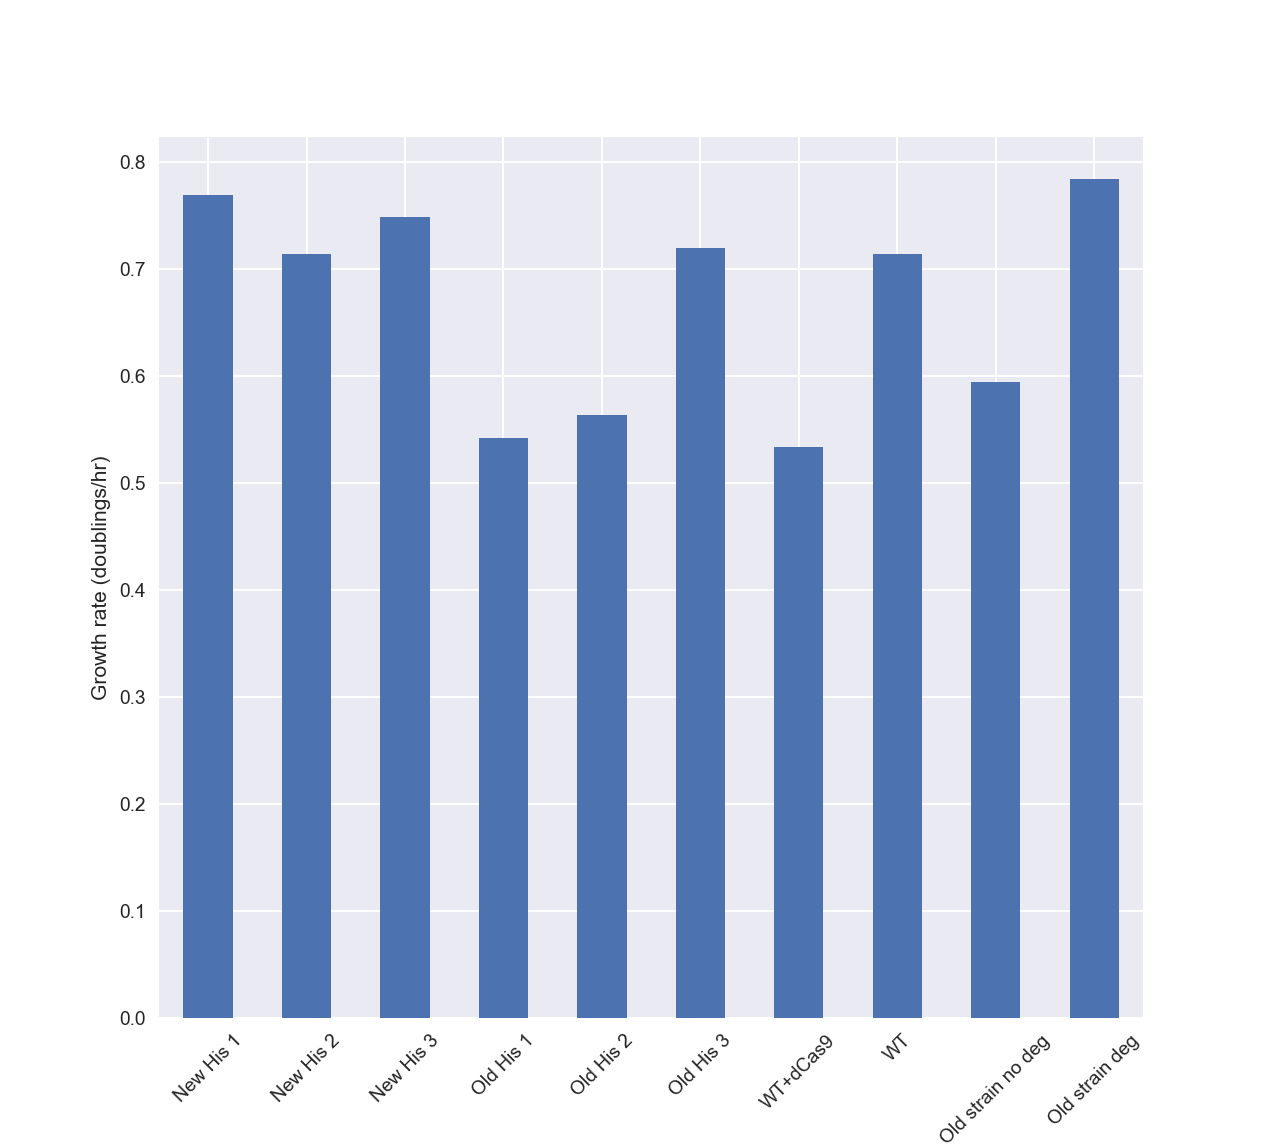

In [32]:
#Make Barplot of slopes: 

#Look for good sns method for plotting a barplot of the different strains.  
fig, ax = plt.subplots()
growth_rates_YPD_BY4741 = pd.DataFrame(growth_data_df_med_bg_avg_log_linrange.T.apply(plate_reader_tools.get_slope))
growth_rates_YPD_BY4741["new_labels"] = ["New His 1", "New His 2", "New His 3", "Old His 1", "Old His 2", "Old His 3", "WT+dCas9","WT","Old strain no deg","Old strain deg"]
growth_rates_YPD_BY4741.set_index("new_labels",inplace=True)
growth_rates_YPD_BY4741.plot(kind='bar', ax=ax, rot = 45, legend = False,)
ax.set_ylabel("Growth rate (doublings/hr)")


<IPython.core.display.Javascript object>


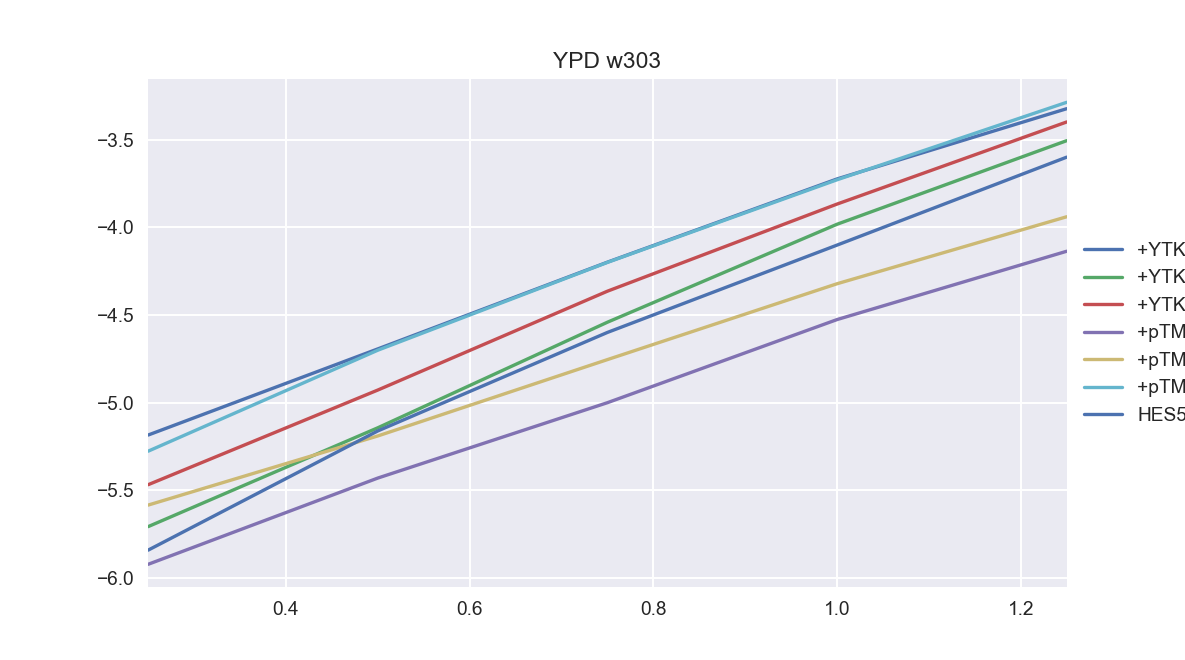

In [33]:
#plot log of YPD W303 strains in linear range

#In between time 0 and 1.5 log plot looked linear.  
t = growth_data_df_med_bg_avg_log.columns
t_low = 0.0 
t_high = 1.5
t_check = (t>t_low)*(t<t_high)
#finds indices of all time values above t_low
t_inds = [ind for ind,val in enumerate(t_check) if val==True]

t_linear_range = t[t_inds]

#Select YPD media and BY4741 background
media = 'YPD'
background = 'w303'
growth_data_df_med_bg = growth_data_df.xs((media,background),level = ['Media','Background'])

#Take average
growth_data_df_med_bg_avg = growth_data_df_med_bg.mean(level='Strain')

#Take Log2
growth_data_df_med_bg_avg_log = np.log(growth_data_df_med_bg_avg)/np.log(2)

#Extract only linear range
growth_data_df_med_bg_avg_log_linrange = growth_data_df_med_bg_avg_log.iloc[:,t_inds]

#Plot
fix, ax = plt.subplots()
growth_data_df_med_bg_avg_log_linrange.transpose().plot(ax = ax, title = media + ' ' + background, legend = True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<IPython.core.display.Javascript object>


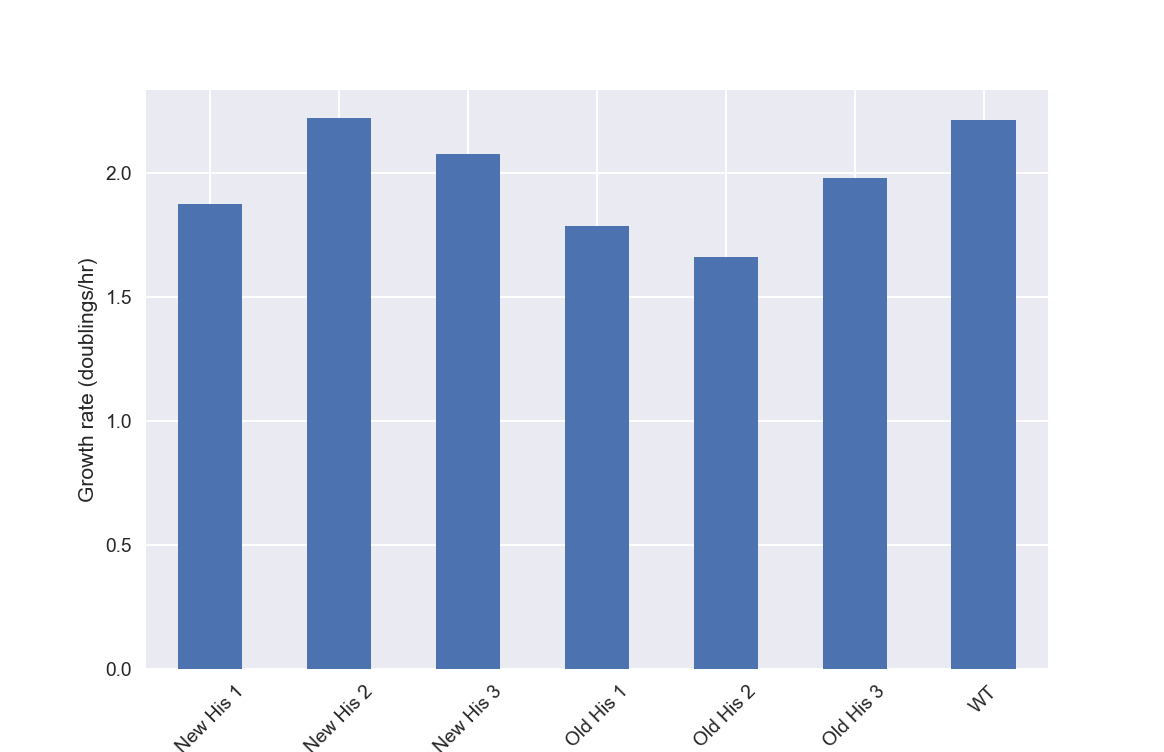

In [34]:
#Make Barplot of slopes: 

#Look for good sns method for plotting a barplot of the different strains.  
fig, ax = plt.subplots()
growth_rates_YPD_W303 = pd.DataFrame(growth_data_df_med_bg_avg_log_linrange.T.apply(plate_reader_tools.get_slope))
growth_rates_YPD_W303["new_labels"] = ["New His 1", "New His 2", "New His 3", "Old His 1", "Old His 2", "Old His 3", "WT"]
growth_rates_YPD_W303.set_index("new_labels",inplace=True)
growth_rates_YPD_W303.plot(kind='bar', ax=ax, rot = 45, legend = False,)
ax.set_ylabel("Growth rate (doublings/hr)")
#fig.savefig(dirname + "plots//YPD_w303_growth_rate.png")